In [1]:
# from src.step06_calculate import BibliometricCalculator, read_repository
import pandas as pd
from src.config import OUTPUT_DIR, DATA_DIR
import matplotlib.pyplot as plt
import numpy as np
import json

# Load Dataset

In [2]:
OUTPUT_DIR = OUTPUT_DIR 
ds_path = DATA_DIR / "dataset-ios.json"


with open(ds_path, "r") as json_file:
    data = json.load(json_file)

# data = read_repository(ds_path)
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   title                                4120 non-null   object
 1   year                                 4120 non-null   object
 2   publisher                            4120 non-null   object
 3   journal_issn                         4120 non-null   object
 4   journal_iso_abbreviation             4120 non-null   object
 5   language                             4120 non-null   object
 6   doi                                  1160 non-null   object
 7   pmid                                 4120 non-null   object
 8   citation_count                       4120 non-null   int64 
 9   IOSPressVolume                       4120 non-null   object
 10  publication_type                     4120 non-null   object
 11  authors                              4120 n

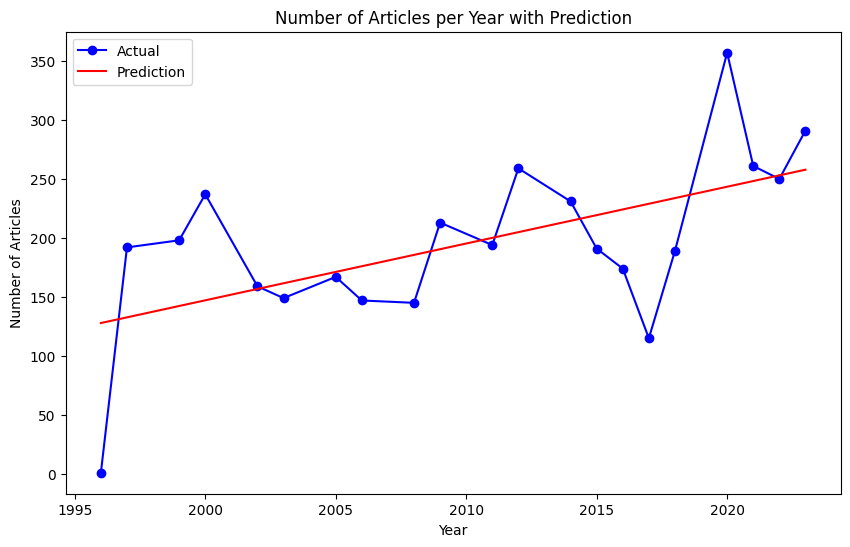

In [4]:
df_year = df.groupby('year')['title'].count().reset_index()

# Convert 'year' column to numeric type
df_year['year'] = pd.to_numeric(df_year['year'])

# Calculate the prediction line
x = df_year['year'].values
y = df_year['title'].values
a, b = np.polyfit(x, y, 1)  # Fit a linear regression model
predicted_y = a * x + b  # Calculate the predicted values

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_year['year'], df_year['title'], 'bo-', label='Actual')
plt.plot(df_year['year'], predicted_y, 'r-', label='Prediction')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year with Prediction')
plt.legend()

# Show the plot
# plt.savefig(OUTPUT_DIR  / "Number of Articles per Year with Prediction.png")
plt.show()


# df_year.to_csv(OUTPUT_DIR / "table_article_year.csv")

In [13]:
print(df_year)

    year  title
0   1996      1
1   1997    192
2   1999    198
3   2000    237
4   2002    159
5   2003    149
6   2005    167
7   2006    147
8   2008    145
9   2009    213
10  2011    194
11  2012    259
12  2014    231
13  2015    191
14  2016    174
15  2017    115
16  2018    189
17  2020    357
18  2021    261
19  2022    250
20  2023    291


# DOI

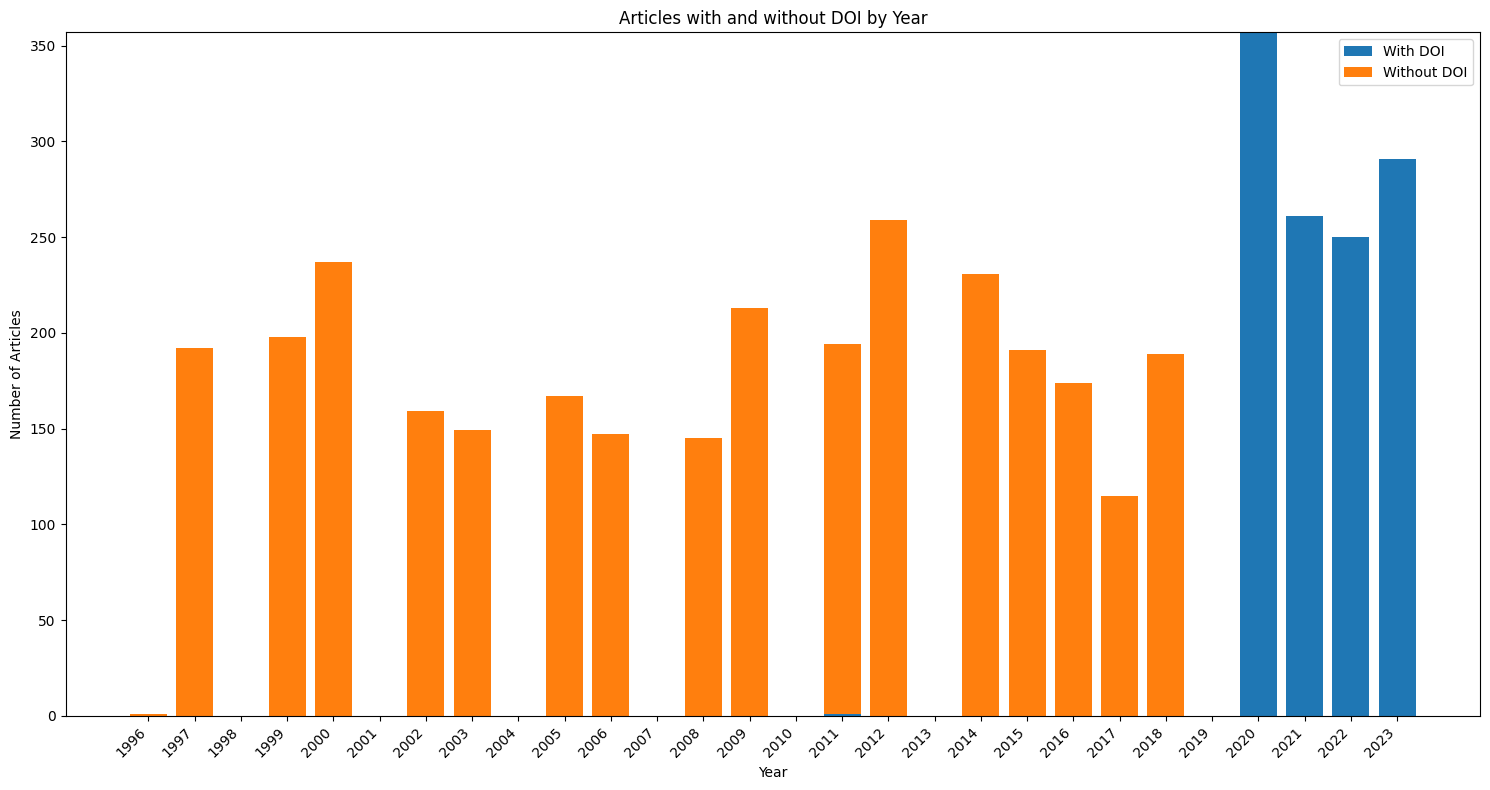

In [8]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without DOI
df['has_doi'] = df['doi'].notna()
df['no_doi'] = df['doi'].isna()


# # Create boolean columns for articles with and without DOI
# df['has_doi'] = df['doi'].str.strip() != ""
# df['no_doi'] = df['doi'].str.strip() == ""

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Merge with the grouped data
grouped = df.groupby('year').agg({
    'has_doi': 'sum',
    'no_doi': 'sum'
}).reset_index()
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['has_doi'], label='With DOI')
plt.bar(grouped['year'], grouped['no_doi'], bottom=grouped['has_doi'], label='Without DOI')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with and without DOI by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with and without DOI by Year.png")
plt.show()

# Citation Count

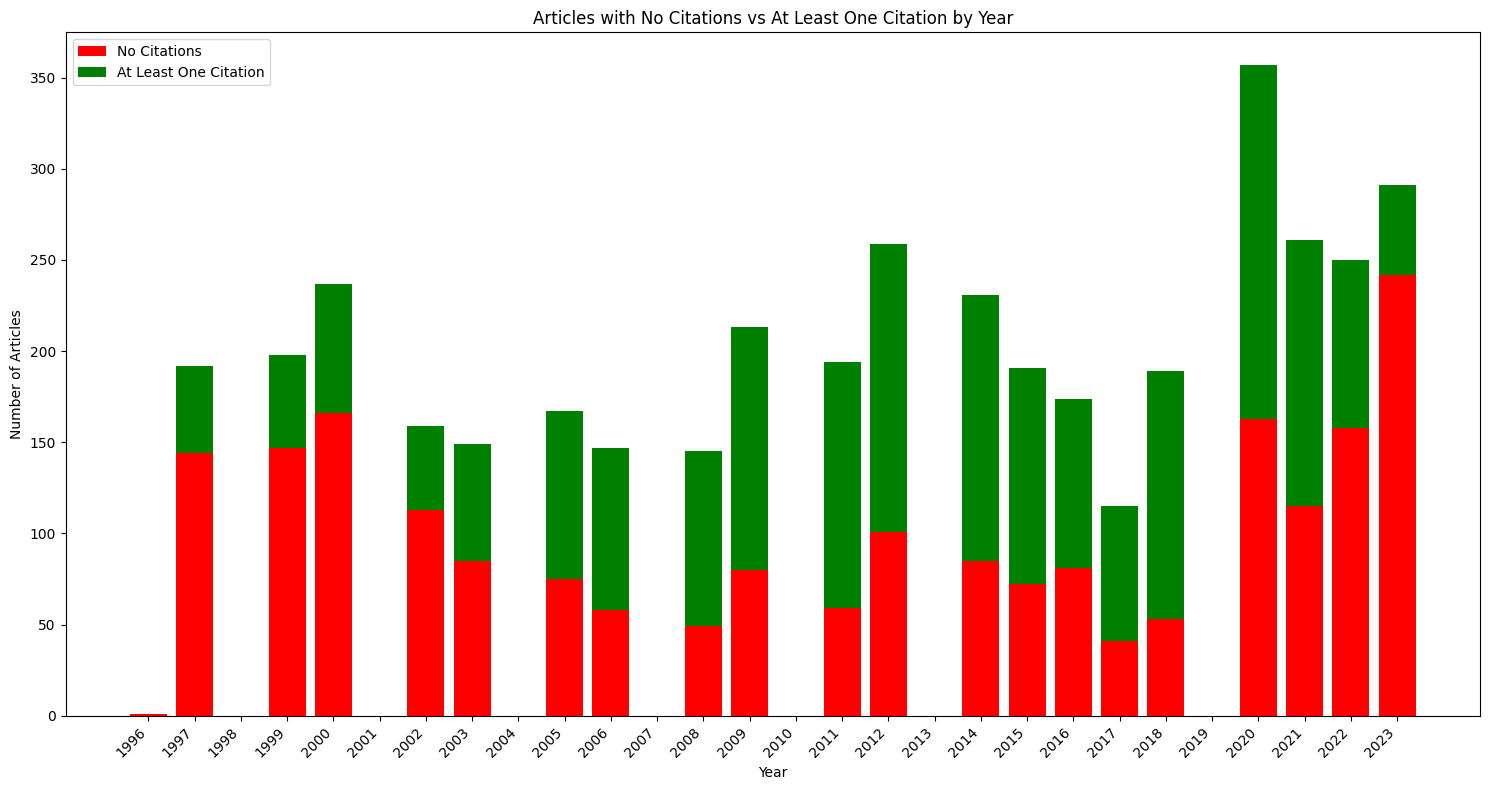

In [9]:
# Create boolean columns for articles with and without citations
df['no_citations'] = df['citation_count'] == 0
df['has_citations'] = df['citation_count'] > 0

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count articles with and without citations
grouped = df.groupby('year').agg({
    'no_citations': 'sum',
    'has_citations': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['no_citations'], label='No Citations',color='red')
plt.bar(grouped['year'], grouped['has_citations'], bottom=grouped['no_citations'], label='At Least One Citation',color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with No Citations vs At Least One Citation by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Citations vs At Least One Citation by Year.png")
plt.show()

# Authors

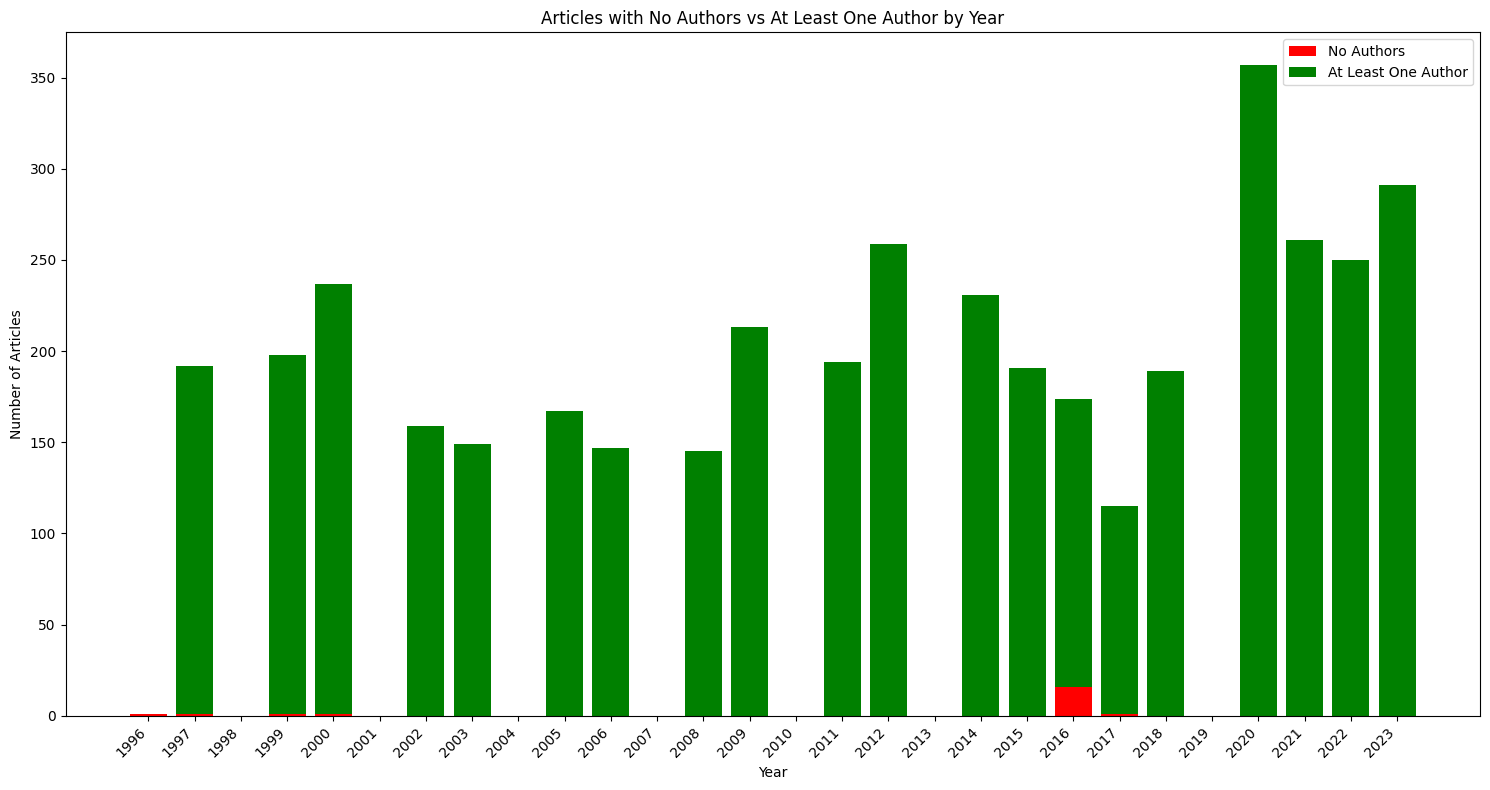

In [10]:
# Step 3: Data manipulation
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without authors
df['no_authors'] = df['authors'].apply(lambda x: len(x) == 0)
df['has_authors'] = df['authors'].apply(lambda x: len(x) > 0)

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count articles with and without authors
grouped = df.groupby('year').agg({
    'no_authors': 'sum',
    'has_authors': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['no_authors'], label='No Authors', color='red')
plt.bar(grouped['year'], grouped['has_authors'], bottom=grouped['no_authors'], label='At Least One Author', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with No Authors vs At Least One Author by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Authors vs At Least One Author by Year.png")
plt.show()

# language

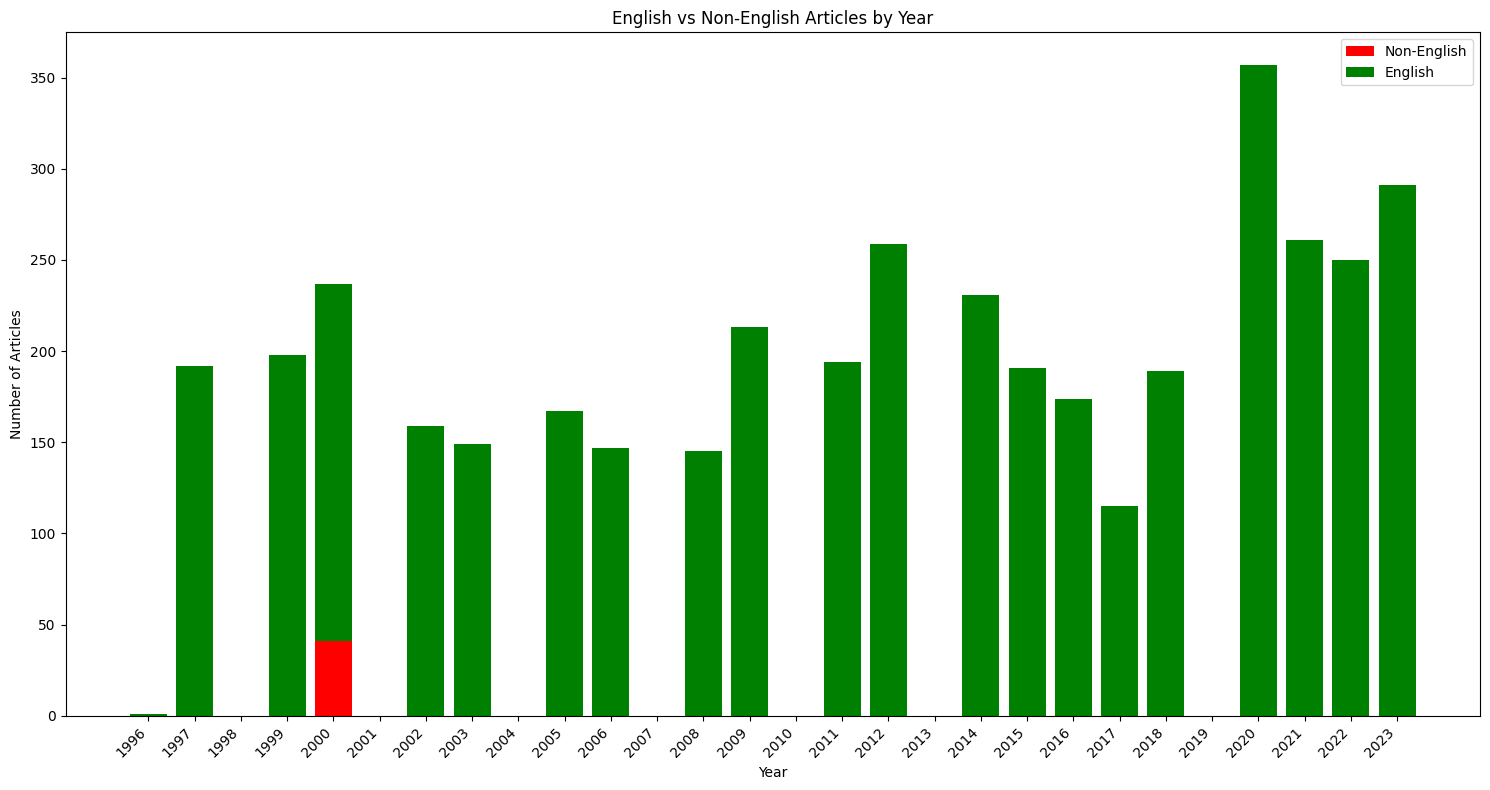

In [11]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for English and non-English articles
df['is_english'] = df['language'].str.lower() == 'eng'
df['non_english'] = df['language'].str.lower() != 'eng'

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count English and non-English articles
grouped = df.groupby('year').agg({
    'is_english': 'sum',
    'non_english': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['non_english'], label='Non-English', color='red')
plt.bar(grouped['year'], grouped['is_english'], bottom=grouped['non_english'], label='English', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('English vs Non-English Articles by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "English vs Non-English Articles by Year.png")
plt.show()